### Diagnostic automatique de maladies coronaniennes


##### Etape 1 : ACP sur les données.


In [262]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.metrics import make_scorer, classification_report, precision_score,recall_score, f1_score, accuracy_score, confusion_matrix, balanced_accuracy_score,roc_auc_score,roc_curve 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree 
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [263]:
#Importation du dataset
data = pd.read_excel("heart.xlsx",index_col=0)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
individus,,,,,,,,,,,,,,
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [265]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [266]:
#On va annoter les variables catégorielles
data["sex"] = data["sex"].astype("category")
data["cp"] = data["cp"].astype("category")
data["fbs"] = data["fbs"].astype("category")
data["restecg"] = data["restecg"].astype("category")
data["exang"] = data["exang"].astype("category")
data["slope"] = data["slope"].astype("category")
data["thal"] = data["thal"].astype("category")
data["target"] = data["target"].astype("category")


In [267]:
#On divise le dataset en un ensemble d'entrainement et un ensemble de test
data_train, data_test = train_test_split(data, test_size=0.25, random_state=None, stratify=data["target"])


In [268]:
#On divise la base d'apprentissage et de test en features et target
features_train = data_train.iloc[:,:-1]
target_train = data_train.iloc[:,-1]

features_test = data_test.iloc[:,:-1]
target_test = data_test.iloc[:,-1]


In [269]:
#On va maintenant faire l'ACP sur les variables quantitatives uniquement 

#On sépare les données quantitatives
numeric_features = features_train.select_dtypes(exclude="category")

#On fait l'ACP
#On centre et reduit les données
sc = SC()
numeric_features_scaled = sc.fit_transform(numeric_features)

acp = PCA()
acp_result = acp.fit_transform(numeric_features_scaled)

le = Le()


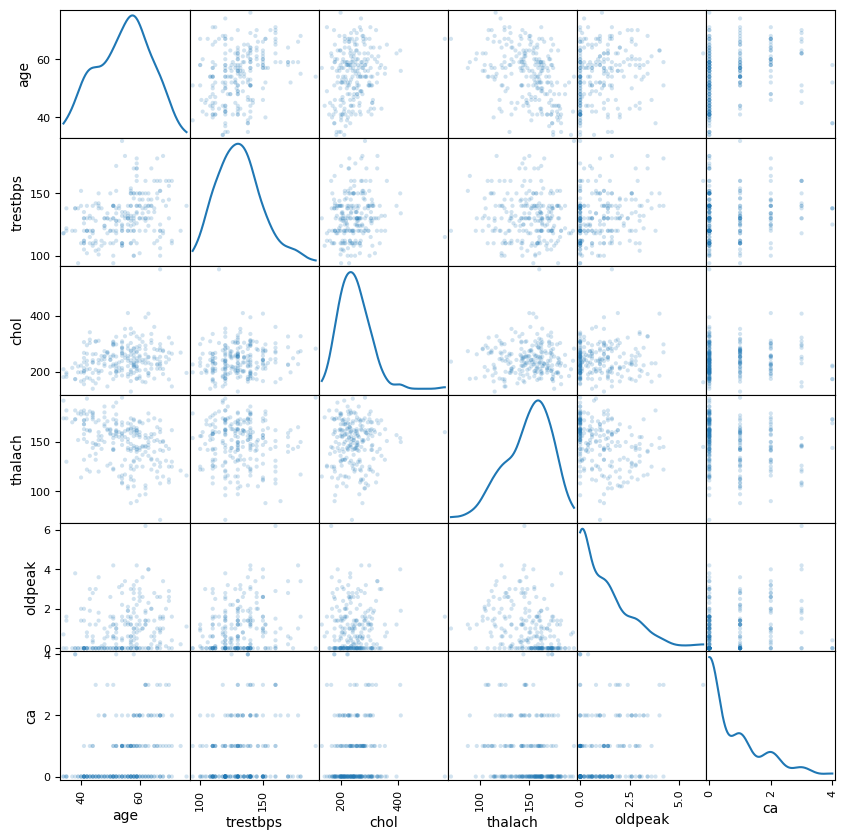

In [270]:
#On va afficher une synthèse de l'analyse bivariée (scatter matrix)
pd.plotting.scatter_matrix(features_train, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

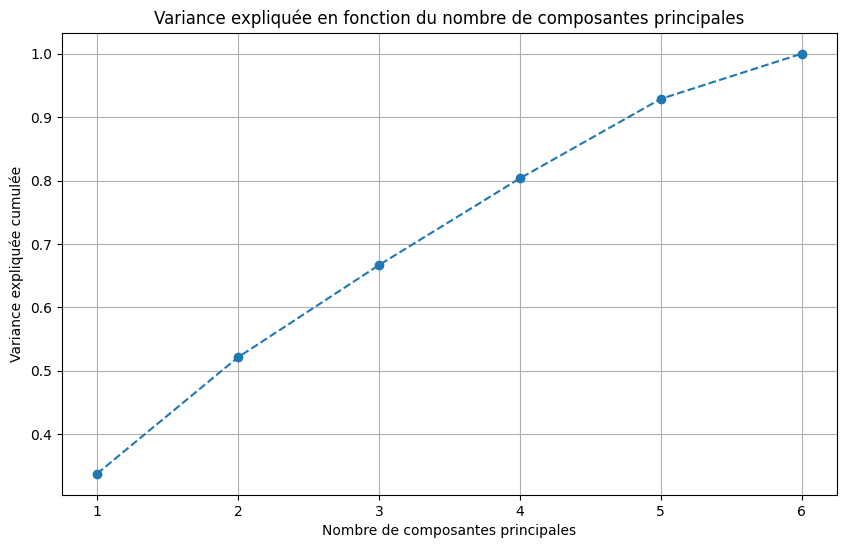

In [271]:
#On va tracer la variance expliquée en fonction du nombre de composantes principales
explained_variance = acp.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée en fonction du nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.show()

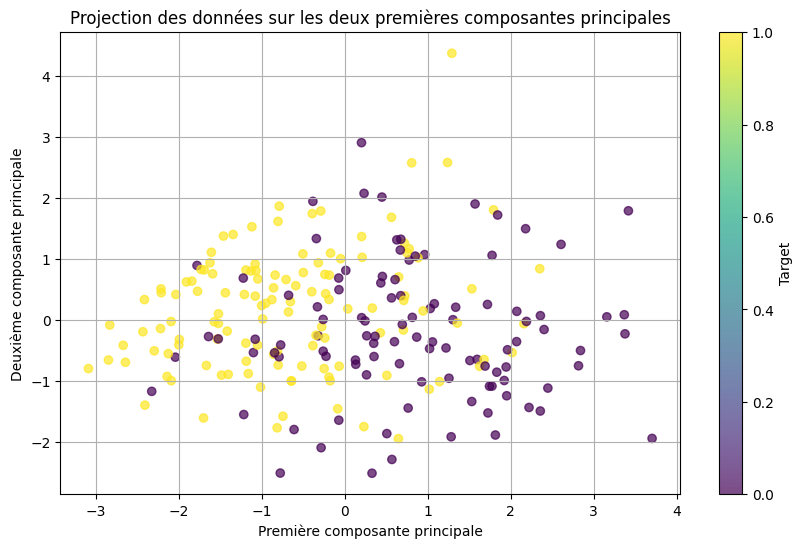

In [272]:
#On va tracer le nuage de points des deux premières composantes principales
plt.figure(figsize=(10,6))  
plt.scatter(acp_result[:,0], acp_result[:,1], c=target_train, cmap='viridis', alpha=0.7)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.colorbar(label='Target')
plt.grid()
plt.show()

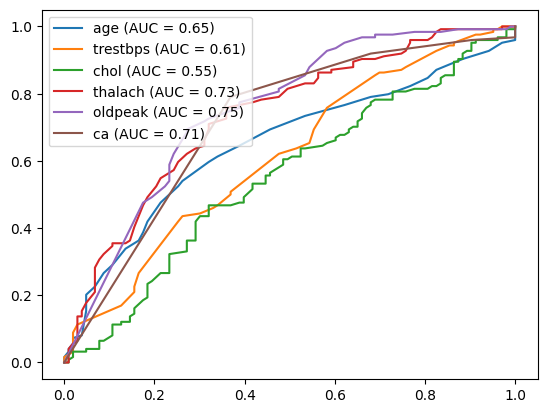

In [273]:
#On va tracer les courbes roc et calculer l'aire sous la courbe pour les différentes features

for column in features_train.columns:
    if features_train[column].dtype.name != 'category':
        fpr, tpr, _ = roc_curve(target_train, features_train[column])
        auc = roc_auc_score(target_train, features_train[column])
        if auc < 0.5:
            fpr, tpr, _ = roc_curve(target_train, -features_train[column])
            auc = roc_auc_score(target_train, -features_train[column])
        plt.plot(fpr, tpr, label=f'{column} (AUC = {auc:.2f})')
        plt.legend(loc='upper left')


#### On va maintenant implémenter un arbre de décision


In [274]:
#On va commencer par fixer ls paramètres du modéle d'arbre de décision de base
classifier = DecisionTreeClassifier(random_state=None)
params = {
    'criterion':['gini','entropy'],
    'ccp_alpha' :np.round(np.linspace(0.0,0.3,15),2),
    }

#Tableau pour les métriques
results_acc = {}
results_pres = {}

for criterion in params['criterion']:
    results_pres[criterion] = {}
    results_acc[criterion] = {}

    for ccp_alpha in params['ccp_alpha']:
        results_acc[criterion][ccp_alpha] = []
        results_pres[criterion][ccp_alpha]= []


for i in range(50):
  #On commence par séparer les données d'entrainement en un ensemble d'entrainement et un ensemble de validation
    X_train, X_val, y_train , y_val = train_test_split(features_train,target_train, test_size=0.25, random_state=None, stratify=target_train)

    for criterion in params['criterion']:
        for ccp_alpha in params['ccp_alpha']:


            classifier.set_params(criterion=criterion, ccp_alpha=ccp_alpha)
            classifier.fit(X_train, y_train)
            y_val_pred = classifier.predict(X_val)
            #On choisit le rappel comme métrique principale
            acc = recall_score(y_val, y_val_pred)
            pres = precision_score(y_val,y_val_pred)
            results_acc[criterion][ccp_alpha].append(acc)
            results_pres[criterion][ccp_alpha].append(pres)



In [275]:
#Fonction pour calculer l'intervalle de confiance à 95%
def intervalle_confiance(echantillon):
    echan = np.array(echantillon)
    moy = np.mean(echan)
    sigma = np.std(echan)
    delta = (1.96*sigma)/(sqrt(len(echantillon)))
    return moy,delta

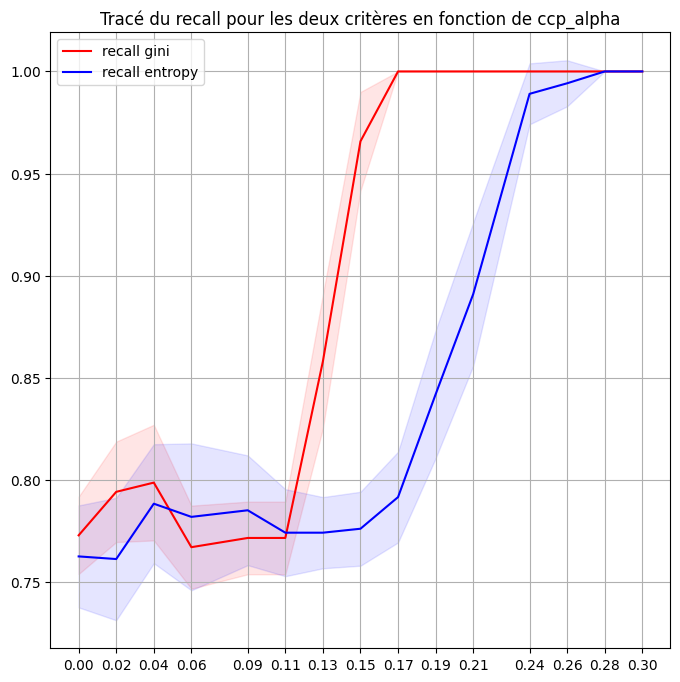

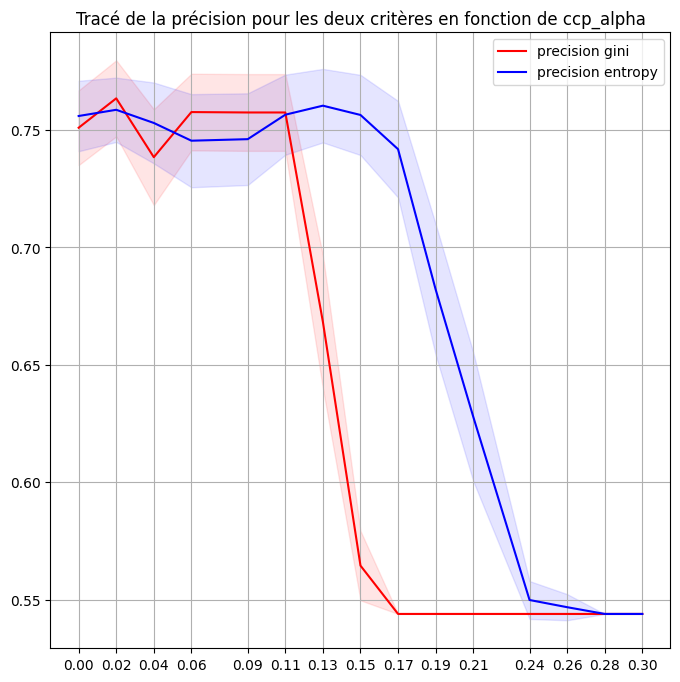

In [276]:
#On extrait les valeurs de results
geni_recall = []
geni_recall_ic = []
geni_pres = []
geni_pres_ic = []
ent_recall = []
ent_recall_ic = []
ent_pres = []
ent_pres_ic = []

for cle,tab in results_acc["gini"].items():
    geni_recall.append(intervalle_confiance(tab)[0])
    geni_recall_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_pres["gini"].items():
    geni_pres.append(intervalle_confiance(tab)[0])
    geni_pres_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_acc["entropy"].items():
    ent_recall.append(intervalle_confiance(tab)[0])
    ent_recall_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_pres["entropy"].items():
    ent_pres.append(intervalle_confiance(tab)[0])
    ent_pres_ic.append(intervalle_confiance(tab)[1])

plt.figure(figsize=(8,8))
plt.plot(params["ccp_alpha"],geni_recall,label = "recall gini",color ="r")
plt.fill_between(params["ccp_alpha"], np.array(geni_recall)-np.array(geni_recall_ic), np.array(geni_recall)+np.array(geni_recall_ic), alpha=0.1, color="r")

plt.plot(params["ccp_alpha"],ent_recall,label= "recall entropy",color="b")
plt.fill_between(params["ccp_alpha"], np.array(ent_recall)-np.array(ent_recall_ic), np.array(ent_recall)+np.array(ent_recall_ic), alpha=0.1, color="b")

plt.legend()
plt.grid()
plt.title("Tracé du recall pour les deux critères en fonction de ccp_alpha")
plt.xticks(params["ccp_alpha"])
plt.show()

plt.figure(figsize=(8,8))
plt.plot(params["ccp_alpha"],geni_pres,label="precision gini",color="r")
plt.fill_between(params["ccp_alpha"], np.array(geni_pres)-np.array(geni_pres_ic), np.array(geni_pres)+np.array(geni_pres_ic), alpha=0.1, color="r")

plt.plot(params["ccp_alpha"],ent_pres,label="precision entropy",color="b")
plt.fill_between(params["ccp_alpha"], np.array(ent_pres)-np.array(ent_pres_ic), np.array(ent_pres)+np.array(ent_pres_ic), alpha=0.1, color="b")

plt.title("Tracé de la précision pour les deux critères en fonction de ccp_alpha")
plt.legend()
plt.grid()
plt.xticks(params["ccp_alpha"])

plt.show()



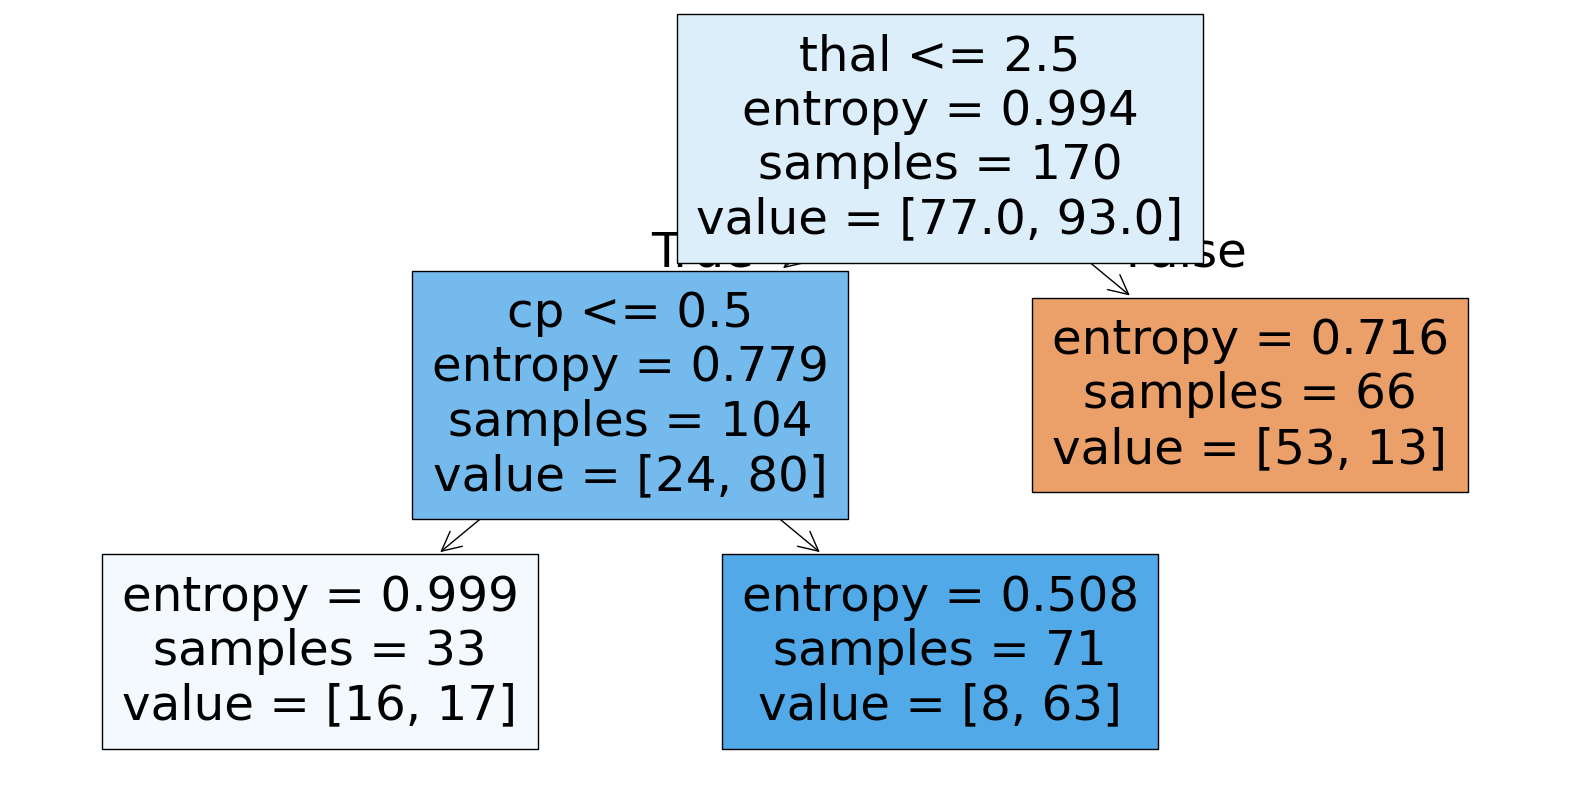

In [277]:
best_criterion = "entropy"
best_ccp_alpha = 0.0643
classifier.set_params(criterion=best_criterion, ccp_alpha=best_ccp_alpha)
classifier.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,filled=True,feature_names=data.columns[:13])
plt.show()

In [278]:
#On construit la random forest de la même façon
params = {
    'n_estimators':np.arange(1,10,1),
    'max_features' :np.array([1,4,13]),
    }
random_forest_model = RandomForestClassifier(criterion=best_criterion,ccp_alpha=best_ccp_alpha)

#Tableau pour les métriques
results_acc = {}
results_pres = {}

for max_feature in params['max_features']:
    results_pres[max_feature] = {}
    results_acc[max_feature] = {}

    for n_estimator in params['n_estimators']:
        results_acc[max_feature][n_estimator] = []
        results_pres[max_feature][n_estimator]= []


for i in range(50):
  #On commence par séparer les données d'entrainement en un ensemble d'entrainement et un ensemble de validation
    X_train, X_val, y_train , y_val = train_test_split(features_train,target_train, test_size=0.25, random_state=None, stratify=target_train)

    for max_feature in params['max_features']:
        for n_estimator in params['n_estimators']:


            random_forest_model.set_params(n_estimators=n_estimator, max_features=max_feature)
            random_forest_model.fit(X_train, y_train)
            y_val_pred = random_forest_model.predict(X_val)
            #On choisit le rappel comme métrique principale
            acc = recall_score(y_val, y_val_pred)
            pres = precision_score(y_val,y_val_pred)
            results_acc[max_feature][n_estimator].append(acc)
            results_pres[max_feature][n_estimator].append(pres)




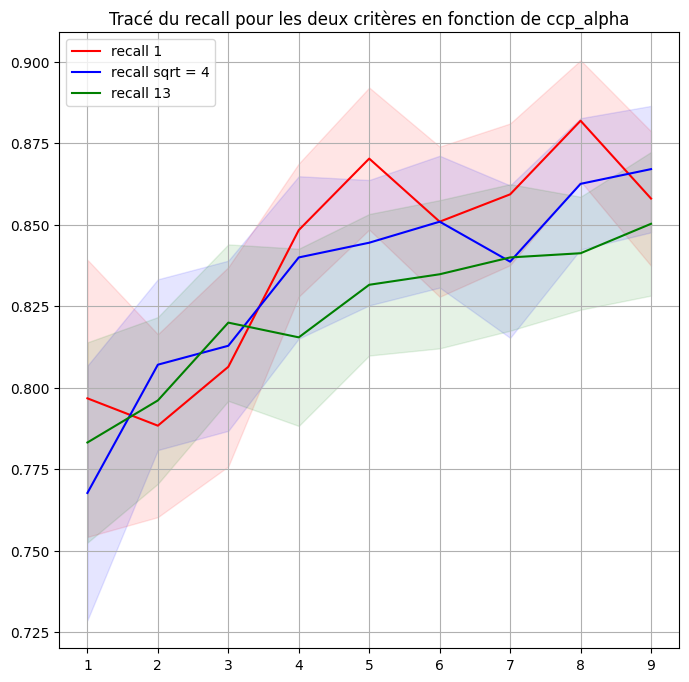

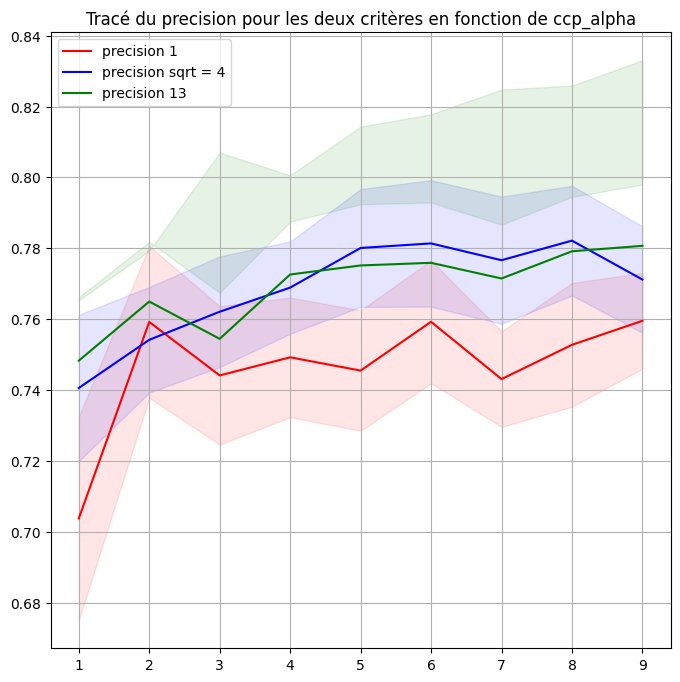

In [279]:
#On extrait les valeurs de results
un_recall = []
un_recall_ic = []
un_pres = []
un_pres_ic = []

sqrt_recall = []
sqrt_recall_ic = []
sqrt_pres = []
sqrt_pres_ic = []

treize_recall = []
treize_recall_ic = []
treize_pres = []
treize_pres_ic = []

for cle,tab in results_acc[1].items():
    un_recall.append(intervalle_confiance(tab)[0])
    un_recall_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_pres[1].items():
    un_pres.append(intervalle_confiance(tab)[0])
    un_pres_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_acc[4].items():
    sqrt_recall.append(intervalle_confiance(tab)[0])
    sqrt_recall_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_pres[4].items():
    sqrt_pres.append(intervalle_confiance(tab)[0])
    sqrt_pres_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_acc[13].items():
    treize_recall.append(intervalle_confiance(tab)[0])
    treize_recall_ic.append(intervalle_confiance(tab)[1])

for cle,tab in results_pres[13].items():
    treize_pres.append(intervalle_confiance(tab)[0])
    treize_pres_ic.append(intervalle_confiance(tab)[1])

plt.figure(figsize=(8,8))

plt.plot(params["n_estimators"],un_recall,label = "recall 1",color ="r")
plt.fill_between(params["n_estimators"], np.array(un_recall)-np.array(un_recall_ic), np.array(un_recall)+np.array(un_recall_ic), alpha=0.1, color="r")

plt.plot(params["n_estimators"],sqrt_recall,label= "recall sqrt = 4",color="b")
plt.fill_between(params["n_estimators"], np.array(sqrt_recall)-np.array(sqrt_recall_ic), np.array(sqrt_recall)+np.array(sqrt_recall_ic), alpha=0.1, color="b")

plt.plot(params["n_estimators"],treize_recall,label= "recall 13",color="g")
plt.fill_between(params["n_estimators"], np.array(treize_recall)-np.array(treize_recall_ic), np.array(treize_recall)+np.array(treize_recall_ic), alpha=0.1, color="g")

plt.legend()
plt.grid()
plt.title("Tracé du recall pour les deux critères en fonction de ccp_alpha")
plt.xticks(params["n_estimators"])
plt.show()

plt.figure(figsize=(8,8))

plt.plot(params["n_estimators"],un_pres,label = "precision 1",color ="r")
plt.fill_between(params["n_estimators"], np.array(un_pres)-np.array(un_pres_ic), np.array(un_pres)+np.array(un_pres_ic), alpha=0.1, color="r")

plt.plot(params["n_estimators"],sqrt_pres,label= "precision sqrt = 4",color="b")
plt.fill_between(params["n_estimators"], np.array(sqrt_pres)-np.array(sqrt_pres_ic), np.array(sqrt_pres)+np.array(sqrt_pres_ic), alpha=0.1, color="b")

plt.plot(params["n_estimators"],treize_pres,label= "precision 13",color="g")
plt.fill_between(params["n_estimators"], np.array(treize_recall)-np.array(treize_pres_ic), np.array(treize_pres)+np.array(treize_pres_ic), alpha=0.1, color="g")

plt.legend()
plt.grid()
plt.title("Tracé du precision pour les deux critères en fonction de ccp_alpha")
plt.xticks(params["n_estimators"])
plt.show()
